# Tarea 3-1: Regresión Polinomial

Este es el código que acompaña la tarea 3 del curso INF-396. En esta implementará una versión simple de la regresión Polinomial

Profesor: Juan Pavez

Integrantes:

* Rodrigo Cayazaya Rol: 201773538-4

* Lucio Fondon Rol: 201773610-0

* Francisco Reyes Rol: 201773529-5

* María Riveros Rol: 201704585-k

* Jorge Sanhueza Rol: 201704575-2

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# ---------------
# En esta sección cargue su dataset del proyecto y realice cualquier visualización y 
# pre procesamiento que estime necesario. Además, si lo desea puede reducir el tamaño de su dataset 
# muestreando 5000 datos de manera aleatoria y al menos 5 características. Divida su dataset en Train set (70%)
# y Test set (30%)
# --------------
df=pd.read_csv("Data/train.csv",index_col=0)

Eliminar null

In [3]:
df.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [4]:
for col in df.columns:
    df[col].replace(' ', np.NaN, inplace=True)
    df[col].replace('', np.NaN, inplace=True)
    df[col].replace(-999999.000000, np.NaN, inplace=True)

In [5]:
df.shape

(76020, 370)

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(75904, 370)

Eliminar filas duplicadas

In [8]:
df.shape

(75904, 370)

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(71106, 370)

Eliminar columnas duplicadas

In [11]:
def getDuplicateColumns(df):
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)

col_duplicadas = getDuplicateColumns(df)

In [12]:
df.shape

(71106, 370)

In [13]:
for columna in col_duplicadas:
    df= df.drop([columna],axis=1)

df.shape

(71106, 308)

Eliminar columnas con pocos datos (mínimo 85% de los datos distintos de 0)

In [14]:
target = df["TARGET"]
df= df.drop(["TARGET"],axis=1)
df=df.replace({0:np.nan})
df = df.dropna(thresh=0.85*len(df), axis=1)

df=df.replace({np.nan:0})
df = pd.concat([df,target],axis=1)
df.shape

(71106, 15)

In [15]:
df.describe()

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
count,71106.000000,71106.000000,71106.000000,71106.000000,71106.000000,71106.000000,71106.000000,71106.00000,71106.000000,71106.000000,71106.000000,71106.000000,71106.000000,7.110600e+04,71106.000000
mean,2.766053,33.560712,0.955419,0.995176,0.885467,0.883892,2.887393,3.39735,2.744536,2.717112,3.218041,38.391120,1.598501,1.171344e+05,0.039561
std,9.767036,13.110099,0.206384,0.069286,0.318460,0.320357,0.675855,1.37820,1.133867,1.097989,0.974346,46.890191,0.713897,1.883690e+05,0.194926
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,3.000000,3.000000,3.000000,2.000000,1.000000,6.583009e+04,0.000000
50%,2.000000,28.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000470e+05,0.000000
75%,2.000000,40.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,3.000000,3.000000,3.000000,99.000000,2.000000,1.228890e+05,0.000000
max,238.000000,105.000000,1.000000,1.000000,1.000000,1.000000,15.000000,114.00000,33.000000,33.000000,114.000000,99.000000,3.000000,2.203474e+07,1.000000


Utilizar solamente 5000 datos

In [16]:
df = df.sample(n=5000, replace=False, random_state = 110)
df.shape

(5000, 15)

División de la data

In [17]:
from sklearn.model_selection import train_test_split
p_train = 0.70 # Porcentaje de train.

target = df["TARGET"]
df= df.drop(["TARGET"],axis=1)

# train = df[:int((len(df))*p_train)]  
# test = df[int((len(df))*p_train):]

# var = PCA(n_components=10)
# df = var.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=p_train, random_state=42)

Normalizar

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Aproximando el resultado

In [19]:
def aproximar(valor):
    if(abs(valor)<0.5):
        return 0
    else:
        return 1

aproximar = np.vectorize(aproximar)

In [20]:
def graficar(res_train,res_test,X):
	# set width of bar
	barWidth = 0.25
	fig = plt.subplots(figsize =(12, 8))

	# Set position of bar on X axis
	br1 = np.arange(len(res_train))
	br2 = [x + barWidth for x in br1]

	# Make the plot
	plt.bar(br1, res_train, color ='r', width = barWidth,
			edgecolor ='black', label ='Train error', linewidth = 1)
	plt.bar(br2, res_test, color ='b', width = barWidth,
			edgecolor ='black', label ='Test error', linewidth = 1)
	plt.plot(br2, np.array(res_test)-1.5, color ='b', marker='*', markerfacecolor='white', markeredgecolor='white')
	plt.plot(br1, np.array(res_train)-1.5, color ='r', marker='*', markerfacecolor='white', markeredgecolor='white')

	# Adding Xticks
	plt.xlabel('Grado del polinomio', fontweight ='bold', fontsize = 15)
	plt.ylabel('Error', fontweight ='bold', fontsize = 15)
	plt.xticks([r + barWidth for r in range(len(res_train))],X)
	plt.title('Gráfico patriota', fontweight ='bold', fontsize = 15)

	plt.legend()
	plt.show()

	#Disclaimer:
	#COMO GRUPO NO VOTAMOS POR KAST

In [21]:
# ---------------
# En esta sección implemente las funciones necesarias
# para la regresión polinomial: 
# features: función con entrada X y que genera una nueva representación X_features
# con features de un polinomio de grado d calculadas de X, utilice el modelo PolynomialFeatures
# de sklearn
# learn: Funcion que toma como entrada X e y y calcula los pesos W, utilizando las ecuaciones normales
# vistas en clases
# model: Funcion que toma una entrada X y pesos W y calcula la predicción del modelo
# error: Función que toma como entrada la prediccion y_hat e y y calcula el error cuadrático
# --------------

def features(X, d):
    # aqui su codigo   
    poly = PolynomialFeatures(d)
    X_features = poly.fit_transform(X)
    return X_features

def learn(X_features, y_train):
    A = X_features
    b = y_train
    At_A = np.dot(A.T,A)
    At_b = np.dot(A.T,b)
    W = np.linalg.solve(At_A,At_b)
    return W

def model(X, W, poly):
    # aqui su codigo
    X_features = poly.fit_transform(X)
    y = np.dot(X_features,W)
    y = aproximar(y)
    return y

def error(y_hat, y):
    #aqui su codigo
    error = np.sum((y_hat - y)**2)
    return error


Polinomio de grado:  1
Error en train:  57
Error en test:  151
-----------------------
Polinomio de grado:  2
Error en train:  56
Error en test:  187
-----------------------
Polinomio de grado:  3
Error en train:  51
Error en test:  331
-----------------------
Polinomio de grado:  5
Error en train:  48
Error en test:  462
-----------------------


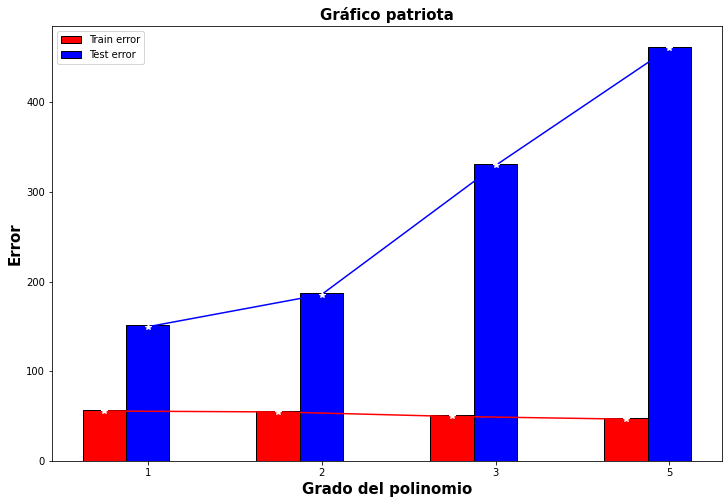

In [22]:
# ---------------
# Entrene modelos con polinomios de grado 1, 2, 3 y 5, 
# Calcule el error cuadrático en el conjunto de test y train para cada caso
# --------------

polinomios = [1, 2, 3, 5]
res_train = []
res_test = []
X = []
for pol in polinomios:
    X_features = features(X_train, pol)
    W = learn(X_features, y_train)
    yTrain = model(X_train, W, PolynomialFeatures(pol))
    errorTrain = error(yTrain, y_train)
    res_train.append(errorTrain)

    yTest = model(X_test, W, PolynomialFeatures(pol))
    errorTest = error(yTest, y_test)
    res_test.append(errorTest)
    X.append(str(pol))

    print("Polinomio de grado: ", pol)
    print("Error en train: ", errorTrain)
    print("Error en test: ", errorTest)
    print("-----------------------")

graficar(res_train,res_test,X)


Polinomio de grado:  1
Error en train:  57
Error en test:  151
-----------------------
Polinomio de grado:  2
Error en train:  56
Error en test:  161
-----------------------
Polinomio de grado:  3
Error en train:  51
Error en test:  218
-----------------------
Polinomio de grado:  5
Error en train:  50
Error en test:  285
-----------------------


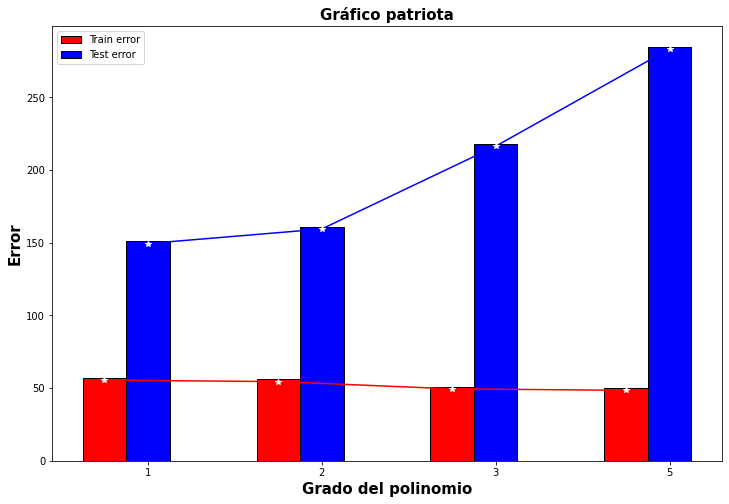

In [23]:
# ---------------
# En esta sección implemente la regresión de Ridge y repita 
# los experimentos anteriores
# --------------
def learn_ridge(X_features, y_train,k):
    A = X_features
    b = y_train
    At_A = np.dot(A.T,A)
    At_A = At_A + k*np.eye(At_A.shape[0])
    At_b = np.dot(A.T,b)
    W = np.linalg.solve(At_A,At_b)
    return W

polinomios = [1, 2, 3, 5]
res_train = []
res_test = []
X = []
for pol in polinomios:
    X_features = features(X_train, pol)
    W = learn_ridge(X_features, y_train,4)
    yTrain = model(X_train, W, PolynomialFeatures(pol))
    errorTrain = error(yTrain, y_train)
    res_train.append(errorTrain)

    yTest = model(X_test, W, PolynomialFeatures(pol))
    errorTest = error(yTest, y_test)
    res_test.append(errorTest)
    X.append(str(pol))
    print("Polinomio de grado: ", pol)
    print("Error en train: ", errorTrain)
    print("Error en test: ", errorTest)
    print("-----------------------")

graficar(res_train,res_test,X)


Conclusión:

El error de train fue disminuyendo a medida que aumentaba el grado del polinomio, sin embargo, sucedió lo contrario con el error de test.

Esta discrepancia sucede por 2 situaciones:
- Nuestro problema es de clasificación (0 y 1) y la regresión polinomial funciona mejor para predecir valores, no para clasificar.
- Eliminamos columnas con muchos 0's, pudiendo haber eliminado una columna donde los 0's sí aportaban información, pero debido al poco contexto de los datos, no podemos saberlo. Produciendo así overfitting.

Cabe destacar que utilizamos normalización de los datos, ya que debido a la gran cantidad de columnas, el procesamiento no terminaba o encontraba una matriz singular.

# Tarea 3-2: Regresión Logística

Este es el código que acompaña la pregunta 2 de al tarea 3 del curso INF-396. En esta implementará una versión simple de la regresión Logística. Para eso utilizará el conjunto de datos adjuntos (tarea2_data.txt).



In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [25]:
# En esta sección implemente las funciones necesarias
# para la regresión logística: cost: Función de costo,
# gradient: Gradiente de la función de costo respecto a los
# parámetros, gradient_descent: Gradiente descendiente
# --------------
def sigmoid(X):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-X))

def probability(theta, X):
    # Returna la probabilidad dedspues de pasarla por la sigmoiddeS
    return sigmoid(np.dot( X, theta))

def cost(X, y, theta):
    m = X.shape[0]
    cost = -(1 / m) * np.sum(y * np.log(probability(theta, X)) + (1 - y) * np.log(1 - probability(theta, X)))
    return cost

def gradient(X, y, theta):
    m = X.shape[0]
    gradient = (1 / m) * np.dot(X.T, sigmoid(np.dot(X, theta)) - y)
    return gradient

def gradient_descent_step(X, y, theta, alpha=0.01):
    diff = -alpha * gradient(X,y,theta)
    theta += diff
    return theta


def gradient_descent(X,y, thetha, iteraciones=100, alpha=0.01):
    thethas = []
    costs = []
    for _ in range(iteraciones):
        thetha = gradient_descent_step(X, y, thetha, alpha=alpha)
        thethas.append(thetha)
        costs.append(cost(X,y,thetha))
    return thethas, costs

In [26]:
# ---------------
# En esta sección lea los datos y entrene el modelo 
# en estos datos
# --------------
thetas, costs = gradient_descent(X_train,y_train,np.zeros((X_train.shape[1])))
print(costs[-1])

0.6922739902427111


In [27]:
# ---------------
# En esta sección implemente al menos dos modificaciones
# del gradiente descendiente original (Adam, Adagrad, Momentum, Momentum Nesterov, ...) 
# y re entrene los modelos
# --------------

#utlizando el método del Momentum

def gradient_descent_step_mom(X, y, theta, gamma= 0.9, alpha=0.01):
    diff = -gamma*theta -(alpha * gradient(X,y,theta))
    theta += diff
    return theta

def gradient_descent_momentum(X,y, thetha, iteraciones=100, alpha=0.01):
    thethas = []
    costs = []
    for _ in range(iteraciones):
        thetha = gradient_descent_step_mom(X, y, thetha, alpha=alpha)
        thethas.append(thetha)
        costs.append(cost(X,y,thetha))
    return thethas, costs

#utlizando el método del Momentum Nesterov

def gradient_descent_step_mom_nest(X, y, theta, gamma= 0.9, alpha=0.01):
    diff = -gamma*theta -(alpha * gradient(X,y,theta-gamma*theta))
    theta += diff
    return theta

def gradient_descent_momentum_nesterov(X,y, thetha, iteraciones=100, alpha=0.01):
    thethas = []
    costs = []
    for _ in range(iteraciones):
        thetha = gradient_descent_step_mom_nest(X, y, thetha, alpha=alpha)
        thethas.append(thetha)
        costs.append(cost(X,y,thetha))
    return thethas, costs

#----------------------------------------------------------

thetas, costs_mom = gradient_descent_momentum(X_train,y_train,np.zeros((X_train.shape[1])))
print(costs_mom[-1])

thetas, costs_mom_nest = gradient_descent_momentum_nesterov(X_train,y_train,np.zeros((X_train.shape[1])))
print(costs_mom_nest[-1])

0.693132343726875
0.693132257416598


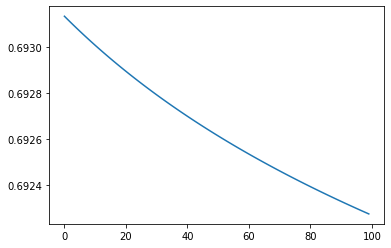

In [28]:
# ---------------
# En esta sección grafique la perdida para cada una
# de las iteraciones, para eso se recomienda utilizar
# matplotlib, la funcion plot
# --------------
plt.plot(costs)

0.6931323

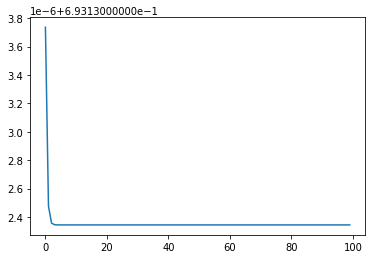

In [29]:
plt.plot(costs_mom)
#valor del gráfico 
2.3*1e-6+6.9313e-1

0.6931323

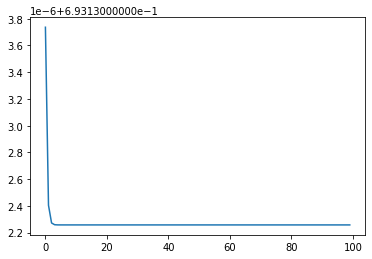

In [30]:
plt.plot(costs_mom_nest)
#valor del gráfico 
2.3*1e-6+6.9313e-1

In [31]:
# ---------------
# En esta sección utilice la libreria sklearn para 
# entrenar un modelo de regresion logistica en los datos
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# luego imprima el coste final para 100 iteraciones
# --------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

model = LogisticRegression(max_iter = 100)
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(np.array(y_test).flatten(),predicted_classes)
parameters = model.coef_
score = log_loss(y_test, predicted_classes)

In [32]:
accuracy

0.9571428571428572

In [33]:
#coste final
score

1.4802332740676016

Referencias

* https://ruder.io/optimizing-gradient-descent/

* https://medium.com/@IwriteDSblog/gradient-descent-for-logistics-regression-in-python-18e033775082